In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('amazon_reviews.csv')
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2782 non-null   object
 1   name    2782 non-null   object
 2   date    2782 non-null   object
 3   rating  2782 non-null   int64 
 4   review  2778 non-null   object
dtypes: int64(1), object(4)
memory usage: 108.8+ KB


In [5]:
df.describe()

,rating
count,2782.000000
mean,3.765636
std,1.577803
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.shape

(2782, 5)

In [9]:
df.mode().head()

,asin,name,date,rating,review
0,B002ZVK88G,Tata-Tea-Gold-500g,2020-08-09,5.0,Good
1,B003OPTXW4,NaN,NaN,NaN,NaN
2,B008YD5500,NaN,NaN,NaN,NaN
3,B008YD57OO,NaN,NaN,NaN,NaN
4,B00AI87X0O,NaN,NaN,NaN,NaN


In [10]:
#finding NA values
df.isna().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [11]:
#filling null values
df.fillna('Good',inplace = True)

In [12]:
df.isna().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [14]:
df.drop(['asin','date'],inplace = True,axis = 1)

In [15]:
# removing unwanted character and number from data, making lower case 
# importing reguler expression

import re
import string

def clean_text(text):
    ''' making text lower case, removing text in square bracket, removing punctuation and numbers'''
    text = text.lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),' ',text)
    text = re.sub('\w*\d\w*',' ',text)
    text = re.sub("[0-9" "]+",' ',text)
    text = re.sub('[‘’“”…]',' ',text)
    return text

clean = lambda x: clean_text(x)

In [18]:
df['review'] = df['review'].apply(clean)

In [19]:
df

,name,rating,review
0,Mamaearth-Onion-Growth-Control-Redensyl,1,i bought this hair oil after viewing so many g...
1,Mamaearth-Onion-Growth-Control-Redensyl,5,used this mama earth newly launched onion oil ...
2,Mamaearth-Onion-Growth-Control-Redensyl,1,so bad product my hair falling increase too ...
3,Mamaearth-Onion-Growth-Control-Redensyl,1,product just smells similar to navarathna hair...
4,Mamaearth-Onion-Growth-Control-Redensyl,5,i have been trying different onion oil for my ...
...,...,...,...
2777,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout the day
2778,Mysore-Sandal-Soaps-Pack-Bars,5,my preferred soap
2779,Mysore-Sandal-Soaps-Pack-Bars,2,ठीक नहीं लगा
2780,Mysore-Sandal-Soaps-Pack-Bars,4,super product


In [21]:
# word freq 
freq = pd.Series(' '.join(df['review']).split()).value_counts()[:50]  # top 20
freq

the        4098
it         3542
i          2868
and        2840
is         2738
to         2166
this       2042
a          1938
for        1876
of         1680
product    1444
in         1420
good       1122
not        1102
but         998
my          978
you         900
with        872
very        838
as          762
s           738
on          702
have        684
was         672
skin        642
tea         610
that        598
t           574
like        568
one         552
so          550
from        516
be          488
after       482
amazon      430
if          428
use         422
are         422
all         408
no          400
soap        400
hair        398
can         390
has         382
or          382
its         380
which       366
using       364
time        358
at          352
dtype: int64

In [23]:
# removing stop words 
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# word freq. after removing stop words
freq_sw = pd.Series(' '.join(df['review']).split()).value_counts()[:20] # top 20 rows
freq_sw

product    1444
good       1122
skin        642
tea         610
like        568
one         552
amazon      430
use         422
soap        400
hair        398
using       364
time        358
buy         334
also        334
best        330
quality     326
watch       314
price       280
taste       280
nice        278
dtype: int64

In [26]:
#Feature Extraction

# Count vectorizer to know fequency of the word.


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1,max_df = 0.9)
xser = vectorizer.fit_transform(df['review'])
word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(),'Occurences':np.asarray(xser.sum(axis = 0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['Occurences']/np.sum(word_freq_df['Occurences'])


In [27]:
word_freq_df.head(60)

,term,Occurences,frequency
0,aa,6,0.000099
1,aam,2,0.000033
2,aamras,6,0.000099
3,abandon,2,0.000033
4,abck,4,0.000066
5,able,24,0.000397
6,abroad,6,0.000099
7,absence,2,0.000033
8,absolute,2,0.000033
9,absolutely,14,0.000232


In [28]:
# NLP english language model of spacy library

import spacy # language models
nlp = spacy.load('en_core_web_sm') 

In [30]:
doc = nlp(' '.join(df['review']))
print(doc[:40])

bought hair oil viewing many good comments product good enough first expensive second thing amount product low half bottle yes bottle completely filled oil cheating customers mamaearth trust fool people know brand good enough going buy product brand thumbs mamaearth


In [31]:
# Lemming

lemmas = [token.lemma_ for token in doc]
print(lemmas[:40])

['buy', 'hair', 'oil', 'view', 'many', 'good', 'comment', 'product', 'good', 'enough', 'first', 'expensive', 'second', 'thing', 'amount', 'product', 'low', 'half', 'bottle', 'yes', 'bottle', 'completely', 'fill', 'oil', 'cheat', 'customer', 'mamaearth', 'trust', 'fool', 'people', 'know', 'brand', 'good', 'enough', 'go', 'buy', 'product', 'brand', 'thumb', 'mamaearth']


In [ ]:
# Feature Extraction

In [32]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)

In [33]:
print(vectorizer.vocabulary_)

{'buy': 433, 'hair': 1399, 'oil': 2197, 'view': 3483, 'many': 1914, 'good': 1337, 'comment': 601, 'product': 2489, 'enough': 1022, 'first': 1179, 'expensive': 1081, 'second': 2811, 'thing': 3248, 'amount': 118, 'low': 1862, 'half': 1406, 'bottle': 364, 'yes': 3639, 'completely': 621, 'fill': 1164, 'cheat': 512, 'customer': 733, 'mamaearth': 1902, 'trust': 3357, 'fool': 1215, 'people': 2331, 'know': 1724, 'brand': 374, 'go': 1328, 'thumb': 3271, 'onion': 2210, 'use': 3432, 'mama': 1901, 'earth': 970, 'newly': 2117, 'launch': 1752, 'twice': 3371, 'must': 2085, 'say': 2781, 'already': 97, 'impressed': 1561, 'result': 2706, 'prevent': 2463, 'loss': 1850, 'help': 1457, 'control': 664, 'premature': 2448, 'grey': 1369, 'dryness': 951, 'dandruff': 755, 'scalp': 2783, 'eruption': 1036, 'problem': 2483, 'regular': 2646, 'avoid': 217, 'dry': 950, 'frizzy': 1261, 'make': 1892, 'sure': 3138, 'week': 3546, 'oiling': 2198, 'provide': 2522, 'essential': 1042, 'nutrient': 2167, 'also': 98, 'strengthen'

In [37]:
print(vectorizer.get_feature_names()[60:100])
print(x.toarray()[60:100])

['affordable', 'aftermarket', 'afterwards', 'againfinal', 'agarbatti', 'agarbattis', 'age', 'agni', 'ago', 'agree', 'ahead', 'aid', 'ailment', 'air', 'airwick', 'al', 'alarm', 'alarming', 'alas', 'alcohol', 'align', 'alkaline', 'allege', 'allergic', 'allergy', 'alli', 'alllllll', 'allow', 'ally', 'almera', 'almond', 'almost', 'aloe', 'aloevera', 'along', 'alot', 'alphonso', 'already', 'also', 'alternative']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
print(x.toarray().shape)

(61506, 3657)


In [40]:
#TFIDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df['review'])
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['acne', 'actually', 'add', 'added', 'affordable', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'amul', 'another', 'antiseptic', 'anything', 'apply', 'applying', 'aroma', 'around', 'arrived', 'available', 'available market', 'average', 'away', 'awesome', 'baby', 'baby lotion', 'back', 'bad', 'band', 'bath', 'bathing', 'bathroom', 'battery', 'beautiful', 'believe', 'best', 'best product', 'better', 'big', 'bit', 'black', 'bleach', 'blue', 'body', 'bottle', 'bought', 'box', 'brand', 'brands', 'broken', 'brown', 'buy', 'buy product', 'buying', 'came', 'cap', 'care', 'case', 'change', 'charged', 'cheap', 'cheaper', 'check', 'chemical', 'chemicals', 'chocolate', 'cinthol', 'clean', 'cleaning', 'clear', 'close', 'clothes', 'color', 'colour', 'come', 'comes', 'compare', 'compared', 'condition', 'cons', 'consistency', 'container', 'contains', 'content', 'cool', 'could', 'cream', 'customer', 'daily', 'damage', 'damaged', 'dark', 'date', 'day', 'days

In [41]:
# Word cloud 
string_total = " ".join(df['review'])

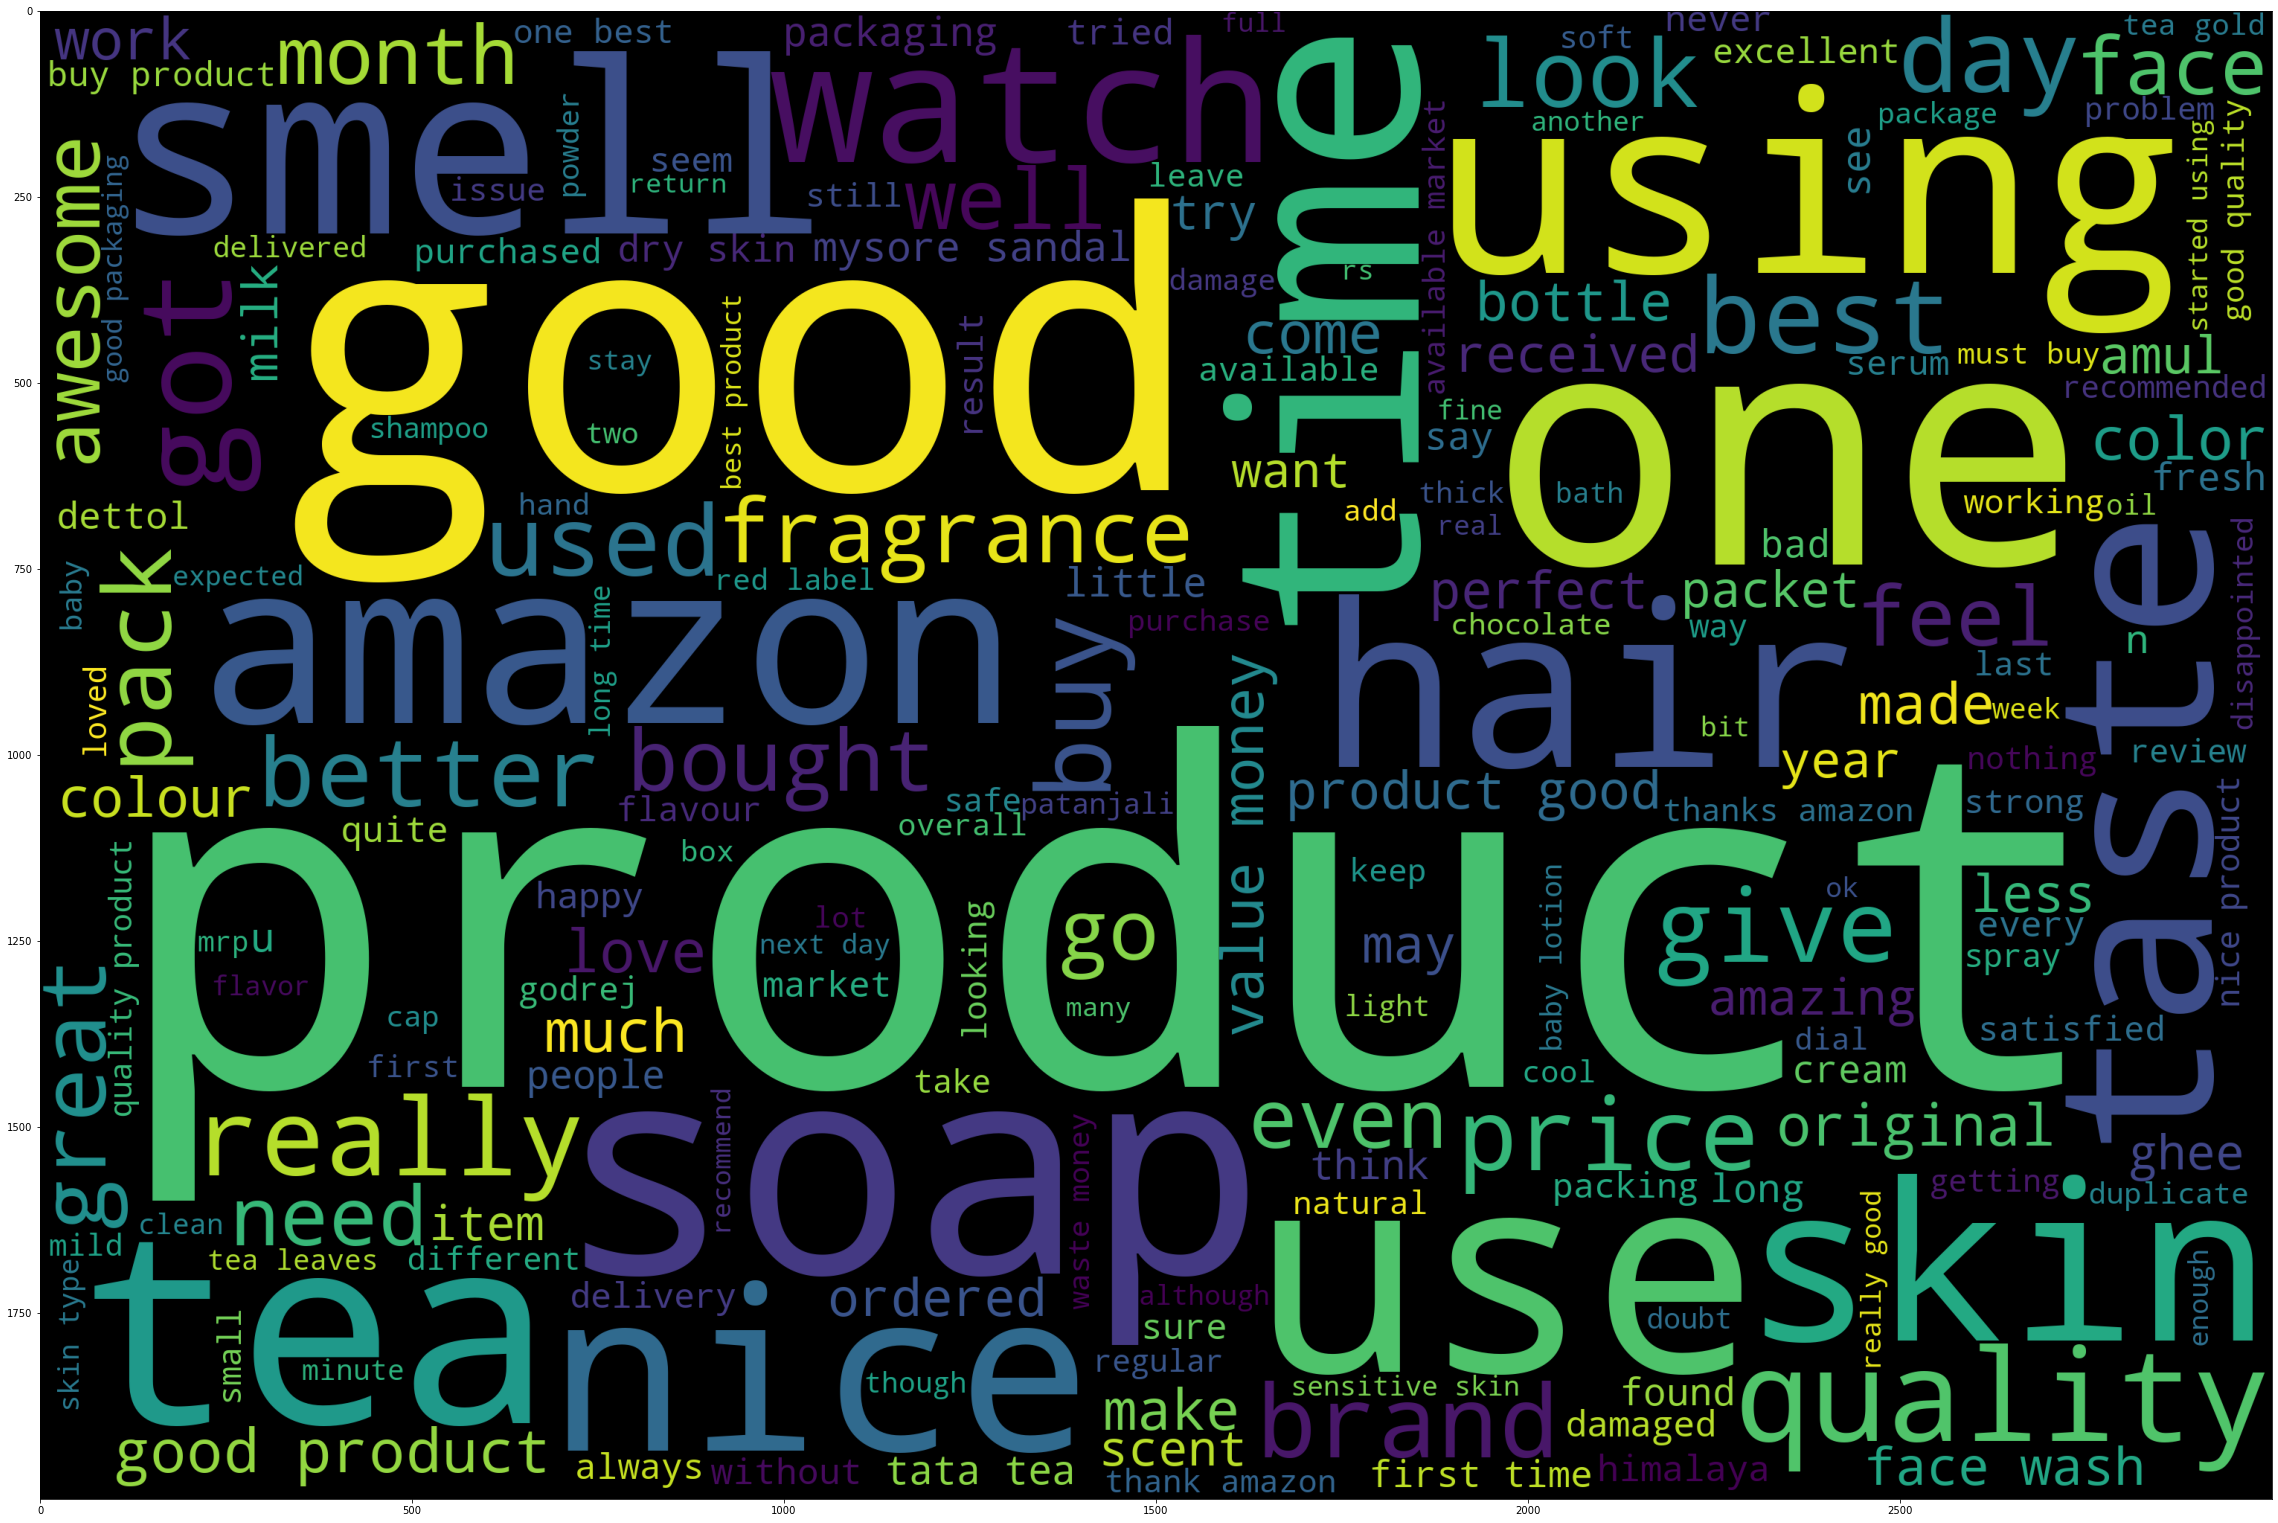

In [42]:
# word cloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(40, 30))
wordcloud_spw = WordCloud(background_color = 'black',width = 3000,height = 2000).generate(string_total)
plt.imshow(wordcloud_spw)
plt.show()

In [ ]:
#Emotion Mining

In [43]:
affinity_scores = df.set_index('review')['rating'].to_dict()

In [44]:
affinity_scores

{'bought hair oil viewing many good comments product good enough first expensive second thing amount product low half bottle yes bottle completely filled oil cheating customers mamaearth trust fool people know brand good enough going buy product brand thumbs mamaearth onion oil': 1,
 'used mama earth newly launched onion oil twice must say im already impressed results prevents hair loss helps control premature greying dryness dandruff scalp eruptions many hair problems regular use avoid dry frizzy hair make sure use oil hairs twice week oiling provides scalp essential nutrients also strengthens hair roots mamaearth onion oil works best hair seasons': 5,
 'bad product hair falling increase much order shampoo mask oil nothing stop hairfallafter wash hair falling badly': 1,
 'product smells similar navarathna hair oil strong oil sticky applying three drops oil review usage worst hair fall increased brought product watching youtube influencer mumbaiker totally misguided never take suggesti

In [45]:
#Custom Function

affinity_scores
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [46]:
calculate_sentiment(text = 'hair')

0

In [47]:
df['sentiment_value'] = df['review'].apply(calculate_sentiment)

In [48]:
df['sentiment_value']

0       15
1        5
2        9
3        4
4        5
        ..
2777     0
2778     0
2779     0
2780     5
2781     0
Name: sentiment_value, Length: 2782, dtype: int64

In [50]:
#Checking how many words are in sentence

df['word_count'] = df['review'].str.split().apply(len)
df['word_count'].head(10)

0    42
1    57
2    17
3    47
4    31
5    64
6    15
7    30
8    31
9    35
Name: word_count, dtype: int64

In [51]:
# sorting values 
df.sort_values(by='sentiment_value').tail(10)

,name,rating,review,sentiment_value,word_count
2240,Tata-Tea-Gold-500g,4,reviewing ctc tea tricky everyone preferences ...,40,89
224,Godrej-No-1-Bathing-Soap-Lime,5,using godrej soap long time fragrance soap rea...,40,46
2318,Tata-Tea-Gold-1kg,5,love tea tata gold tea one best product tata u...,40,125
2308,Tata-Tea-Gold-1kg,5,love tea tata gold tea one best product tata u...,40,125
2210,Tata-Tea-Gold-500g,4,reviewing ctc tea tricky everyone preferences ...,40,89
2220,Tata-Tea-Gold-500g,4,reviewing ctc tea tricky everyone preferences ...,40,89
234,Godrej-No-1-Bathing-Soap-Lime,5,using godrej soap long time fragrance soap rea...,40,46
2230,Tata-Tea-Gold-500g,4,reviewing ctc tea tricky everyone preferences ...,40,89
2249,Tata-Tea-Gold-500g,5,one best tea house tata beautiful tea good tas...,45,117
2259,Tata-Tea-Gold-500g,5,one best tea house tata beautiful tea good tas...,45,117


In [52]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    2782.000000
mean        5.902948
std         6.457668
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        45.000000
Name: sentiment_value, dtype: float64

In [53]:
# Sentiment score of the whole review   # if <=0
df[df['sentiment_value']<=0]

,name,rating,review,sentiment_value,word_count
6,Mamaearth-Onion-Growth-Control-Redensyl,1,purchased oil shampoo watching fake youtube cu...,0,15
8,Mamaearth-Onion-Growth-Control-Redensyl,3,showing onion oil benefits ad ate giving onion...,0,31
16,Mamaearth-Onion-Growth-Control-Redensyl,1,purchased oil shampoo watching fake youtube cu...,0,15
18,Mamaearth-Onion-Growth-Control-Redensyl,3,showing onion oil benefits ad ate giving onion...,0,31
26,Mamaearth-Percent-Natural-Berry-Toothpaste,4,bought years baby mentioned even child gulps a...,0,19
...,...,...,...,...,...
2774,Mysore-Sandal-Soaps-Pack-Bars,1,return replaceadd tex,0,3
2777,Mysore-Sandal-Soaps-Pack-Bars,5,long lasting freshness throughout day,0,5
2778,Mysore-Sandal-Soaps-Pack-Bars,5,preferred soap,0,2
2779,Mysore-Sandal-Soaps-Pack-Bars,2,ठीक नहीं लगा,0,3


In [55]:
# if >=20 
df[df['sentiment_value']>=20]

,name,rating,review,sentiment_value,word_count
64,Mamaearth-Natural-Turmeric-Saffron-brightning,5,tried product majorly name ingredients first t...,30,48
74,Mamaearth-Natural-Turmeric-Saffron-brightning,5,tried product majorly name ingredients first t...,30,48
84,Mamaearth-Natural-Turmeric-Saffron-brightning,5,tried product majorly name ingredients first t...,30,48
94,Mamaearth-Natural-Turmeric-Saffron-brightning,5,tried product majorly name ingredients first t...,30,48
126,Mamaearth-Blemishes-Pigmentation-Blemish-Mulberry,2,hello everyone please buy product looking mois...,25,78
...,...,...,...,...,...
2596,MYSORE-SANDAL-Mysore-Sandal-Talcum,5,thank amazon recommendation engine suggesting ...,25,163
2606,MYSORE-SANDAL-Mysore-Sandal-Talcum,5,thank amazon recommendation engine suggesting ...,25,163
2616,MYSORE-SANDAL-Mysore-Sandal-Talcum,5,thank amazon recommendation engine suggesting ...,25,163
2648,Mysore-Sandal-Gold-Soap-Pack,5,always give five stars soap best recommend ple...,25,24


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


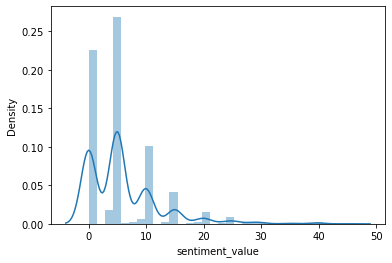

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value'])
plt.show()

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

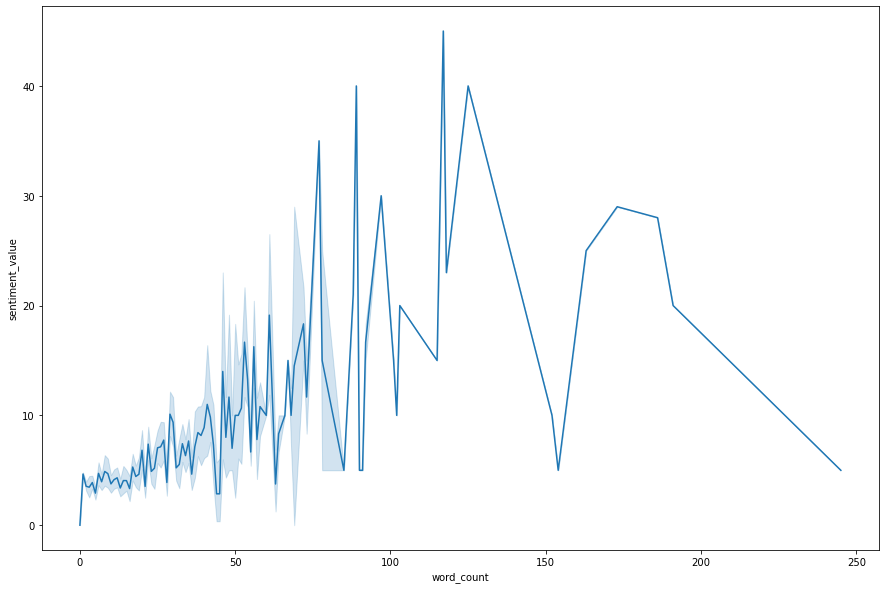

In [58]:
# lineplot
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='word_count',data=df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

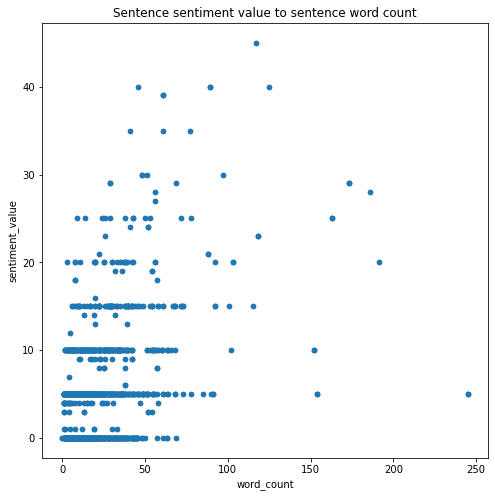

In [59]:
# scatter plot 
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [60]:
#Rating Analysis

In [61]:
# product rating counts
df['rating'].value_counts()

5    1444
1     546
4     464
3     198
2     130
Name: rating, dtype: int64

In [63]:
import spacy # language models
nlp = spacy.load('en_core_web_sm') 

In [64]:
# required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [65]:
tfidf = CountVectorizer(analyzer='char', ngram_range=(1,3), max_features = 20000)

In [66]:
# dividing data into x , y
X = tfidf.fit_transform(df['review'])
y = df['rating']

In [67]:
X.shape, y.shape

((2782, 5407), (2782,))

In [68]:
# spliting the data to avoid overfiting situation
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [69]:
X_train.shape

(2225, 5407)

In [70]:
# applying and fitting model SVM
clf = LinearSVC(C = 10)  # C is inverse of parameter regulation,it regulate hyper parameters
clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10)

In [71]:
# predicting values
y_pred = clf.predict(X_test)

In [72]:
# calculating accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88       108
           2       1.00      0.79      0.88        29
           3       0.88      0.75      0.81        48
           4       0.86      0.79      0.82        90
           5       0.89      0.95      0.92       282

    accuracy                           0.89       557
   macro avg       0.90      0.83      0.86       557
weighted avg       0.89      0.89      0.88       557



In [ ]:
#Accuracy = 89%